# Define necessary functions

In [1]:
import matplotlib.pyplot as plt
def plot_images(images, label, n=16):
    fig, ax = plt.subplots(n//4, 4, figsize=(20, 20))
    for i in range(n):
        image = images[i]
        label = labels[i]
        ax[i//4, i%4].imshow(image)
        ax[i//4, i%4].set_title(class_names[label])
        ax[i//4, i%4].axis('off')

def plot_images_one_hot_encoded(images, labels, n=16):
    fig, ax = plt.subplots(n//4, 4, figsize=(20, 20))
    for i in range(n):
        image = images[i]
        label = labels[i]
        ax[i//4, i%4].imshow(image)
        ax[i//4, i%4].set_title(class_names[np.argmax(label)])
        ax[i//4, i%4].axis('off')

def plot_predictions(images, labels, predictions, n=3):
    fig, ax = plt.subplots(n, 2, figsize=(20, 20))
    
    for i in range(n):
        image = images[i]
        label = labels[i]
        ax[i, 0].imshow(image[0])
        ax[i, 0].set_title('Actual: {}'.format(class_names[label[0]]))
        ax[i, 0].axis('off')
        ax[i, 1].bar(class_names, predictions[i])
        ax[i, 1].set_title('Predicted: {}'.format(class_names[np.argmax(predictions[i])]))

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    
    ax[0].plot(history.history['accuracy'], label='accuracy')
    ax[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_ylim([0, 1])
    ax[0].legend(loc='lower right')
    
    ax[1].plot(history.history['loss'], label='loss')
    ax[1].plot(history.history['val_loss'], label = 'val_loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].set_ylim([0, 2])
    ax[1].legend(loc='upper right')

    # plot
    # precision,
    # recall,
    # MeanSquaredError,
    # AUC,
    # FalseNegatives,
    # FalsePositives,
    # TrueNegatives,
    # TruePositives,
    

# Preparing data

## Splitting data into subfolders
To simplify working with keras' augmentation techniques using the ImageDataGenerator, we split our images into different sets behorehand.
This process can be performed multiple times to shuffle the images and get new results.

In [2]:
# Create a new folder 'split_data' that stores images in a 'training', 'validation' and 'test' folder
# with the respective class names as subfolders
import glob
import random
import os
import shutil
import time

class_names = ['CombWrench', 'Hammer', 'Screwdriver', 'Wrench']

def split_data(data_dir, train_size=0.7, val_size=0.2, test_size=0.1):
    # Make a list of all images for each class in the data directory
    images = glob.glob(data_dir + '/*/*')

    # Shuffle the images
    random.shuffle(images) 
    
    # Class names already set previously
    # Create a list of class names
    # class_names = []
    # for folder in os.listdir(data_dir):
    #     if os.path.isdir(os.path.join(data_dir, folder)):
    #         class_names.append(folder)
    
    # Create a new folder 'split_data' that stores images in a 'training', 'validation' and 'test' folder
    # with the respective class names as subfolders
    # If it already exists, create new folder with the time appended
    pathname = 'split_data'

    if os.path.exists('split_data'):
        pathname = 'split_data_' + time.strftime("%Y%m%d-%H%M%S")

    os.makedirs(pathname, exist_ok=True)
    os.makedirs(os.path.join(pathname, 'training'), exist_ok=True)
    os.makedirs(os.path.join(pathname, 'validation'), exist_ok=True)
    os.makedirs(os.path.join(pathname, 'test'), exist_ok=True)

    for class_name in class_names:
        os.makedirs(os.path.join(pathname, 'training', class_name), exist_ok=True)
        os.makedirs(os.path.join(pathname, 'validation', class_name), exist_ok=True)
        os.makedirs(os.path.join(pathname, 'test', class_name), exist_ok=True)
    
    # Split the images into training, validation and test sets
    image_amt = len(images)
    train_split = int(image_amt * train_size)
    val_split = int(image_amt * val_size)
    test_split = int(image_amt * test_size)

    # Check if the splits add up to the total number of images, and if not, adjust the test split
    if train_split+val_split+test_split != len(images):
        test_split = test_split + 1

    print('Train split:', train_split)
    print('Validation split:', val_split)
    print('Test split:', test_split)

    print('Total images:', len(images))
    print('Sum of splits:', train_split + val_split + test_split)

    assert train_split + val_split + test_split == len(images)

    # Make sure that the amount of images for each class is equal
    # Count the number of images for each class
    class_counts = {}
    for image in images:
        class_name = image.split('/')[-2]
        if class_name not in class_counts:
            class_counts[class_name] = 0
        class_counts[class_name] += 1
    
    print('Class counts:', class_counts)
    
    images_per_class = train_split // 4
    print('Images per class:', images_per_class)

    images_per_class_ctr = {}

    for name in class_names:
        images_per_class_ctr[name] = 0
    
    print("Images per class ctr: ", images_per_class_ctr)

    for i, image in enumerate(images):
        class_name = image.split('/')[-2]
        target_folder = 'training' if i < train_split else 'validation' if i < train_split + val_split else 'test'

        target_path = os.path.join(pathname, target_folder, class_name)
        shutil.copy(image, target_path)

        # print(f"Copying {image} to {target_path}")  # Debug: print where each file is copied

    # Make sure that the training data has the same amount of images for each class (= images_per_class)
    # Take these from the test set

    #  I did this manually really quick... 



        # # The rest can go into test
        # if (target_folder == 'training'):
        #     if (images_per_class_ctr[class_name] < images_per_class):
        #         target_folder = 'training'
        #         images_per_class_ctr[class_name] += 1
        #     else:
        #         target_folder = 'test'

    # # Copy the images to the new folders
    # for i, image in enumerate(images):
    #     class_name = image.split('/')[-2]
    #     # Populate training folder
    #     if i < train_split:
    #         shutil.copy(image, pathname + '/training/' + class_name)
    #     # Populate validation folder
    #     elif i < train_split + val_split:
    #         shutil.copy(image, pathname + '/validation/' + class_name)
    #     # Populate test folder
    #     else:
    #         shutil.copy(image, pathname + '/test/' + class_name)

    print('Data split into training, validation and test sets')


In [3]:
split_data('data')

Train split: 142
Validation split: 40
Test split: 21
Total images: 203
Sum of splits: 203
Class counts: {'Screwdriver': 50, 'Wrench': 50, 'CombWrench': 52, 'Hammer': 51}
Images per class: 35
Images per class ctr:  {'CombWrench': 0, 'Hammer': 0, 'Screwdriver': 0, 'Wrench': 0}
Data split into training, validation and test sets


## Loading data

In [4]:
import tensorflow as tf


img_height, img_width = 256, 256
def load_data(directory, img_height, img_width, batch_size):
    return tf.keras.utils.image_dataset_from_directory(
        directory,
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

train_dataset = load_data('split_data/training', img_height, img_width, 32)
validation_dataset = load_data('split_data/validation', img_height, img_width, 32)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    'split_data/test',
    image_size=(256, 256),
    batch_size=32)

Found 142 files belonging to 4 classes.
Found 40 files belonging to 4 classes.
Found 21 files belonging to 4 classes.


# Setting up a model

## Augmentation

In [5]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(img_height, img_width),
  tf.keras.layers.Rescaling(1./255)
])

preprocessing_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
    #tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

2024-05-13 17:29:34.272170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


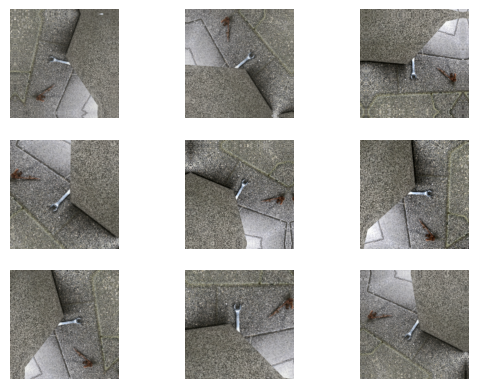

In [6]:
# Show example
for images, labels in train_dataset.take(1):
    for i in range(9):
        augmented_images = preprocessing_layers(images)
        # resize and rescale
        augmented_images = resize_and_rescale(augmented_images)

        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy())
        plt.axis('off')

## Building the model

Conv2D: for convolutional layers
MaxPooling2D: for pooling layers
Flatten: for flattening the data
Dense: for fully connected layers
Dropout: for dropout layers

First input layer, convolution has 16 filters, each filter is 5,5 with stride 1
Pooling layer, 2x2 default stride, takes max values from 2x2 grid and passes them on so halves the size
Second convolutional layer, 32 filters, 3x3
Second pooling layer
Third convolutional layer, 16 filters, 3x3
...
Flatten the data, we dont want channel values, so we flatten
First fully connected layer, 256 neurons
Output layer, 4 neurons, one for each class

Dropout layer, 0.2 probability of dropout, not needed.. check loss values for overfitting

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = Sequential([
    preprocessing_layers,
    resize_and_rescale,
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model = Sequential([
        preprocessing_layers,
        resize_and_rescale,
        Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        # Dropout(0.5),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(4, activation='softmax')
    ])


# model = Sequential([
#     preprocessing_layers,
#     resize_and_rescale,
#     Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     # Dropout(0.5),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.4),
#     Dense(4, activation='softmax')
# ])


# vgg_base = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (256, 256, 3))
# vgg_base.trainable = False
# inputs = Input(shape=(256, 256, 3))

# x = vgg_base(inputs, training=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# outputs = tf.keras.layers.Dense(4, activation = 'sigmoid')(x)
# vgg_model = Model(inputs, outputs)
# vgg_model.summary

# vgg_model.compile(
#     optimizer=keras.optimizers.Adam(),
#     loss= keras.losses.SparseCategoricalCrossentropy(),
#     metrics= [keras.metrics.CategoricalAccuracy()],
# )
# vgg_model.fit(train_dataset, epochs=25, validation_data=validation_dataset)

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(4, activation='softmax'))

# model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
# print(model.summary())


# model = Sequential([
#         Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(256, 256, 3)),
#         Activation('relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         BatchNormalization(),
        
#         Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
#         Activation('relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         BatchNormalization(),
        
#         Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
#         Activation('relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         BatchNormalization(),
        
#         Flatten(),
        
#         Dense(units=256, activation='relu'),
#         Dropout(0.5),
#         Dense(units=6, activation='softmax')
#     ])

# model = Sequential([
#     preprocessing_layers,
#     resize_and_rescale,
#     Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(4, activation='softmax')
# ])


model = Sequential([
    preprocessing_layers,
    resize_and_rescale,
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])


import tensorflow.keras as keras

precision = keras.metrics.Precision(class_id=None, name='precision')
recall = keras.metrics.Recall(class_id=None, name='recall')
sc_accuracy = keras.metrics.SparseCategoricalAccuracy(name="sc_accuracy", dtype=None)

# Using Adam optimizer
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[
        'accuracy',
        sc_accuracy,
        # precision,
        # recall
    ]
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.2873 - loss: 1.4042 - sc_accuracy: 0.2873 - val_accuracy: 0.2250 - val_loss: 1.4150 - val_sc_accuracy: 0.2250
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 0.2388 - loss: 1.4125 - sc_accuracy: 0.2388 - val_accuracy: 0.3500 - val_loss: 1.3533 - val_sc_accuracy: 0.3500
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.2421 - loss: 1.4048 - sc_accuracy: 0.2421 - val_accuracy: 0.2500 - val_loss: 1.3954 - val_sc_accuracy: 0.2500
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.2072 - loss: 1.3958 - sc_accuracy: 0.2072 - val_accuracy: 0.2250 - val_loss: 1.4291 - val_sc_accuracy: 0.2250
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step - accuracy: 0.2963 - loss: 1.3877 - sc_accuracy: 0.2963 - val_accuracy: 0.2000 - val_loss: 1.4530 - val_sc_accuracy: 0.2000
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - accuracy: 0.2944 - loss: 1.3882 - sc_accuracy: 0.2944 - val_accuracy: 0.1750 -

## Plots

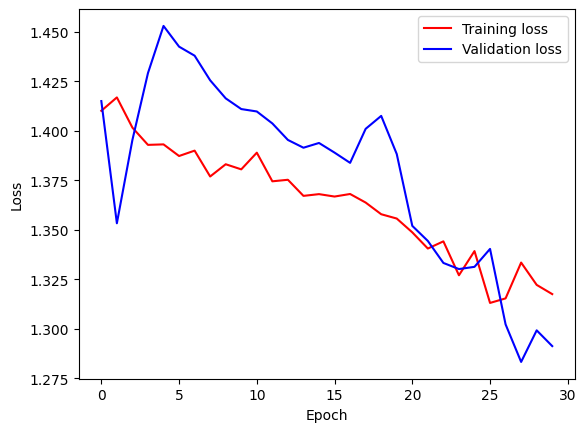

In [60]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='Training loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

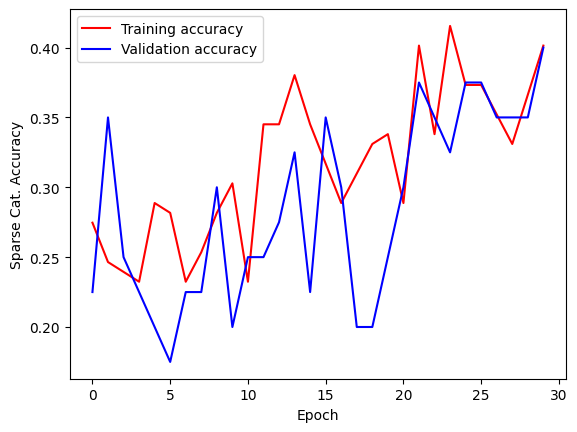

In [61]:
fig = plt.figure()
plt.plot(history.history['sc_accuracy'], color='red', label='Training accuracy')
plt.plot(history.history['val_sc_accuracy'], color='blue', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Sparse Cat. Accuracy')
plt.legend()
plt.show()

## Model Evaluation

In [62]:
results = model.evaluate(test_dataset)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.3333 - loss: 1.4061 - sc_accuracy: 0.3333
Test Loss: 1.406145691871643
Test Accuracy: 0.3333333432674408


### Per-class metrics

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Collect all labels and predictions
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())  # Collect true labels
    y_pred.extend(np.argmax(preds, axis=1))  # Collect predicted labels

# Convert lists to numpy arrays for sklearn functions
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
# For the classification report, you need the names of the classes.
# Assuming you have a list `class_names` that corresponds to the order of classes as they appear in the dataset:
cr = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", cr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Confusion Matrix:
 [[4 1 1 0]
 [3 0 2 1]
 [3 1 2 1]
 [0 0 1 1]]
Classification Report:
               precision    recall  f1-score   support

  CombWrench       0.40      0.67      0.50         6
      Hammer       0.00      0.00      0.00         6
 Screwdriver       0.33      0.29      0.31         7
      Wrench       0.33      0.50      0.40         2

    accuracy                           0.33        21
   macro avg       0.27      0.36      0.30        21
weighted avg       0.26      0.33      0.28        21



2024-05-13 19:45:01.762764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Some example results

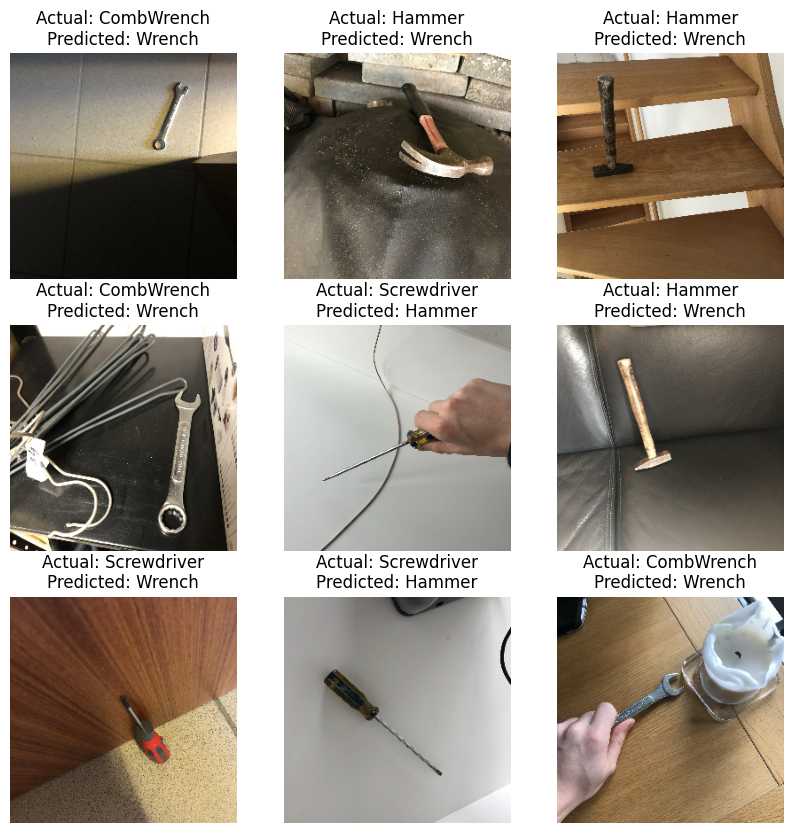

In [32]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# for images, labels in test_dataset:
#     preds = model.predict(images)
#     y_true.extend(labels.numpy())  # Collect true labels
#     y_pred.extend(np.argmax(preds, axis=1))  # Collect predicted labels


# Plotting
plt.figure(figsize=(10, 10))
# Get the number of images in the batch
num_images = 9

# Plot the images
for i in range(num_images):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Actual: {class_names[labels[i]]}\nPredicted: {class_names[np.argmax(preds[i])]}")
    plt.axis("off")

In [ ]:
# Create a figure with 3 rows and 2 columns
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Plot the first 3 images
for i in range(3):
    image = images[i].numpy().astype("uint8")
    
    ax[i, 0].imshow(image)
    ax[i, 0].set_title('Actual: {}'.format(class_names[labels[i]]))
    ax[i, 0].axis('off')
    ax[i, 1].bar(class_names, preds[i])
    ax[i, 1].set_title('Predicted: {}'.format(class_names[np.argmax(preds[i])]))

plt.tight_layout()
plt.show()


# Ensemble learning method.

Create model for each class and combine.

# First attempts
The goal is to build a CNN. The data currently at our disposal is limited so we are using data augmentation methods to create more training data and increase the diversity.

In [ ]:
# Define basic values for the project
data_dir = 'data'
img_height = 256
img_width = 256
batch_size = 16
class_names = ['CombWrench', 'Hammer', 'Screwdriver', 'Wrench']


## Creating our dataset
To make use of tenserflow/keras features, we need to structure our data in a way that makes sense for the libraries. Currently we have a folder for each tool-type with a set of pictures (all of type JPEG).

Here, we are loading it using different Keras image processing utilities. See [https://www.tensorflow.org/tutorials/load_data/images]()

In [ ]:
import tensorflow as tf
import os

In [ ]:
import tensorflow as tf

devices = tf.config.list_physical_devices()
print(f"Devices: {devices}")

gpus = tf.config.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpus, True)

print(f'GPUs: {gpus}')


## Extracting extra data & Data augmentation

todo: data augmentation should only be done on the training set

In [ ]:
data_dir = 'data'

## Loading data


In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# tf.data.Dataset.list_files('data/*/*')

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(
    'data', 
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    # class_names=class_names
)

# Print class names
print(data.class_names)

## Preprocessing

### Scaling
images.max() pixelvalue is 255. We want values between 0 and 1 so we are going to scale images. 

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
images, labels = next(scaled_iterator)

In [ ]:
plot_images(images, labels)

### Split training, validation and test set

In [ ]:
len(data) 
# 13 number of batches

In [ ]:
training_size = int(0.7*len(data))
validation_size = int(0.2*len(data))
test_size = int(0.1*len(data))+1

In [ ]:
training_size+validation_size+test_size == len(data)

In [ ]:
training_set = data.take(training_size)
validation_set = data.skip(training_size).take(validation_size)
test_set = data.skip(training_size+validation_size).take(test_size)

In [ ]:
print("Training size:", training_size)
print("Validation size:", validation_size)
print("Test size:", test_size)

## Training the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Conv2D: for convolutional layers
# MaxPooling2D: for pooling layers
# Flatten: for flattening the data
# Dense: for fully connected layers
# Dropout: for dropout layers

In [ ]:
model = Sequential()

# First input layer, convolution has 16 filters, each filter is 3x3
# Activation function is ReLU... why??
# Stride is 1
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
# Pooling layer, 2x2 default stride, takes max values from 2x2 grid and passes them on so halves the size
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer, 32 filters, 3x3
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
# Second pooling layer
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer, 16 filters, 3x3
model.add(Conv2D(16, (3, 3), 1, activation='relu'))

# model.add(Conv2D(64, (3, 3), 1, activation='relu')) --> everything is a hammer

# Third pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the data, we dont want channel values, so we flatten
model.add(Flatten())

# First fully connected layer, 256 neurons
model.add(Dense(256, activation='relu'))

# Output layer, 4 neurons, one for each class
model.add(Dense(4, activation='softmax'))

# # Dropout layer, 0.2 probability of dropout, not needed.. check loss values for overfitting
# model.add(Dropout(0.2))

In [ ]:
import tensorflow.keras as keras
# model.compile(
#     optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), 
#     loss=keras.losses.SparseCategoricalCrossentropy(), 
#     metrics=[keras.metrics.SparseCategoricalAccuracy()]
# )

# # Using Adam optimizer
# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
#     loss=keras.losses.SparseCategoricalCrossentropy(), 
#     metrics=[keras.metrics.SparseCategoricalAccuracy()]
# )

# Using Adam optimizer
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(
            name="sc_accuracy", 
            dtype=None
        ),
        # https://keras.io/api/metrics/classification_metrics/#precision-class
        # If used with a loss function that sets from_logits=True 
        # (i.e. no sigmoid applied to predictions), thresholds should be set to 0. 
        # from_logits=False because we apply a softmax activation function to the output layer
        keras.metrics.Precision(
            thresholds=None, 
            top_k=None, 
            class_id=None, 
            name='precision', 
            dtype=None
        ),
        keras.metrics.Recall(
            thresholds=None, 
            top_k=None, 
            class_id=None, 
            name='recall', 
            dtype=None
        ),
        # keras.metrics.F1Score(
        #     average="micro", 
        #     threshold=None, 
        #     name="f1_score", 
        #     dtype=None
        # ),
    ]
)

In [ ]:
model.summary()

## Training

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Explain to do
20 epochs

In [ ]:
hist = model.fit(
    training_set, 
    validation_data=validation_set, 
    epochs=20, 
    batch_size=16, 
    callbacks=[tensorboard_callback]
)

# Plots

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='Training loss')
plt.plot(hist.history['val_loss'], color='blue', label='Validation loss')
plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='Training accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.legend()
plt.show()


In [ ]:
plot_training_history(hist)

# Evaluate model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

# Evaluate the model on the test set
results = model.evaluate(test_set, batch_size=16)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(test_set.take(3))
print("predictions shape:", predictions.shape)

In [ ]:
# Show specific predictions next to the images
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

for i in range(3):
    image, label = next(test_set.as_numpy_iterator())
    ax[i, 0].imshow(image[0])
    ax[i, 0].set_title('Actual: {}'.format(class_names[label[0]]))
    ax[i, 0].axis('off')
    ax[i, 1].bar(class_names, predictions[i])
    ax[i, 1].set_title('Predicted: {}'.format(class_names[np.argmax(predictions[i])]))

plt.show()

# Training with augmented data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect', # or 'nearest'
    validation_split=0.0,
    # preprocessing_function=augment_brightness
)

train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='sparse', # or categorical, but we dont want one hot encoding
    shuffle=True,
    subset='training',
    seed=123,
)

# for batch in range(10):
#     images, labels = next(train_generator)
#     for i in range(batch_size):
#         img = images[i]
#         label = labels[i]
#         cv2.imwrite(f'augmented_images/{class_names[int(label)]}_{batch}_{i}.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# No validation split


In [ ]:
# Generate augmented images and save them to new directory for inspection
x, y = next(train_generator)

for batch in data_gen.flow(x, 
                            batch_size=16, 
                            save_to_dir='augmented_data', 
                            save_prefix='aug', 
                            save_format='jpeg'):
    pass


In [ ]:
model = Sequential()

# First input layer, convolution has 16 filters, each filter is 3x3
# Activation function is ReLU... why??
# Stride is 1
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
# Pooling layer, 2x2 default stride, takes max values from 2x2 grid and passes them on so halves the size
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer, 32 filters, 3x3
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
# Second pooling layer
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer, 16 filters, 3x3
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
# Third pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the data, we dont want channel values, so we flatten
model.add(Flatten())

# First fully connected layer, 256 neurons
model.add(Dense(256, activation='relu'))

# Output layer, 4 neurons, one for each class
model.add(Dense(4, activation='softmax'))

# # Dropout layer, 0.2 probability of dropout, not needed.. check loss values for overfitting
# model.add(Dropout(0.2))

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [ ]:
model_fit = model.fit(
    train_generator, 
    epochs=20,
    batch_size=16,
    callbacks=[tensorboard_callback]
)